In [ ]:
import pandas as pd
import numpy as np 
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

#Eksplorasi Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_all = pd.read_csv('drive/My Drive/TUGAS AKHIR/DATASET/rotten_tomatoes_critic_reviews.csv')
df_all

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [ ]:
duplicates = df_all[df_all.duplicated()]
duplicates

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
35514,m/1069696-screamers,Dave White,False,Movies.com,Fresh,B-,1996-01-26,NaN
35577,m/1069707-othello,Fred Topel,False,About.com,Fresh,4/5,2003-11-25,Fine Shakespeare adaptation
41316,m/1087935-buena_vista_social_club,NaN,False,Film Threat,Fresh,4/5,2002-12-08,NaN
41324,m/1087935-buena_vista_social_club,NaN,False,Film Threat,Fresh,4/5,2005-12-06,NaN
47711,m/1105979-brothers,NaN,False,Film Threat,Fresh,3.5/5,2002-12-08,NaN
...,...,...,...,...,...,...,...,...
900961,m/super_duper_alice_cooper,Jeff Baker,False,Oregonian,Fresh,B,2014-10-10,"The story is a familiar one, the vintage clips..."
900963,m/super_duper_alice_cooper,Pat Padua,False,Spectrum Culture,Rotten,2.75/5,2018-08-31,The familiar arc is fueled by a potent theme t...
955172,m/the_fog_of_war_eleven_lessons_from_the_life_...,NaN,False,Film Threat,Fresh,4/5,2005-12-06,NaN
959491,m/the_girl_with_the_dragon_tattoo_2009,NaN,False,National Post,Fresh,3.5/4,2009-02-27,NaN


In [ ]:
df_all = df_all.drop_duplicates()

In [ ]:
duplicates = df_all[df_all.duplicated()]
duplicates

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010546 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1010546 non-null  object
 1   critic_name           994092 non-null   object
 2   top_critic            1010546 non-null  bool  
 3   publisher_name        1010546 non-null  object
 4   review_type           1010546 non-null  object
 5   review_score          736941 non-null   object
 6   review_date           1010546 non-null  object
 7   review_content        952020 non-null   object
dtypes: bool(1), object(7)
memory usage: 62.6+ MB


In [ ]:
#convert string date time to python date time object

#If ‘raise’, then invalid parsing will raise an exception.
#If ‘coerce’, then invalid parsing will be set as NaT.
#If ‘ignore’, then invalid parsing will return the input.
df_all['review_date'] = pd.to_datetime(df_all['review_date'], errors='coerce') 
df_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [ ]:
df_all = df_all[(df_all['review_date'].dt.year >= 2020) ]
df_all

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
145,m/0814255,Sarah Knight Adamson,False,Sarah's Backstage Pass,Fresh,3/4,2020-01-13,As a former middle school teacher of gifted li...
146,m/0814255,Felicia Feaster,False,Charleston City Paper,Fresh,NaN,2020-01-23,The Lightning Thief is an admirable kid's fant...
147,m/0814255,Leigh Paatsch,False,Herald Sun (Australia),Rotten,2.5/5,2020-06-26,"OK, but only just."
148,m/0814255,Richard Propes,False,TheIndependentCritic.com,Rotten,2/4,2020-09-19,There's nothing resembling a spark in this fil...
289,m/0878835,Felicia Feaster,False,Charleston City Paper,Fresh,NaN,2020-01-22,Please Give is truly a film for our age; it's ...
...,...,...,...,...,...,...,...,...
1129975,m/zootopia,Danielle Solzman,False,Solzy at the Movies,Fresh,5/5,2020-09-24,Zootopia is the rare animated Disney film that...
1129985,m/zorba_the_greek,Merl Edelman,False,Los Angeles Free Press,Fresh,NaN,2020-02-05,[Director Michael] Cacoyannis' skills as a cra...
1130007,m/zulu,Isabel Quigly,False,The Spectator,Fresh,NaN,2020-03-11,"The tension mounts, breaks, mounts, seems unbe..."
1130008,m/zulu,Joan Didion,False,Vogue,Fresh,NaN,2020-03-16,A rousing reconstruction of the 1879 Battle of...


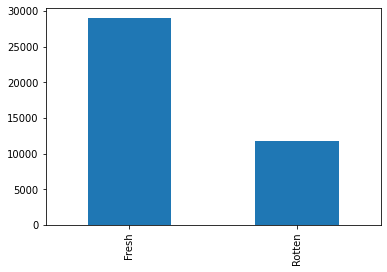

In [ ]:
label_count = df_all['review_type'].value_counts()
label_count.plot(kind='bar')
plt.show()

#PreProcessing

In [ ]:
df = df_all[['review_content','review_type']]
df.head()

,review_content,review_type
145,As a former middle school teacher of gifted li...,Fresh
146,The Lightning Thief is an admirable kid's fant...,Fresh
147,"OK, but only just.",Rotten
148,There's nothing resembling a spark in this fil...,Rotten
289,Please Give is truly a film for our age; it's ...,Fresh


## Label Encoding

In [ ]:
#convert review_type to int using label encoder
#
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['review_type'] = le.fit_transform(df.review_type)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#0 = fresh
#1 = rotten
df.head()

,review_content,review_type
145,As a former middle school teacher of gifted li...,0
146,The Lightning Thief is an admirable kid's fant...,0
147,"OK, but only just.",1
148,There's nothing resembling a spark in this fil...,1
289,Please Give is truly a film for our age; it's ...,0


## Case Folding

In [ ]:
df['review_content'] = df['review_content'].str.lower()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_content,review_type
145,as a former middle school teacher of gifted li...,0
146,the lightning thief is an admirable kid's fant...,0
147,"ok, but only just.",1
148,there's nothing resembling a spark in this fil...,1
289,please give is truly a film for our age; it's ...,0


## Cleansing

In [ ]:
stringconv = str(df['review_content'])
print(stringconv)

145        as a former middle school teacher of gifted li...
146        the lightning thief is an admirable kid's fant...
147                                       ok, but only just.
148        there's nothing resembling a spark in this fil...
289        please give is truly a film for our age; it's ...
                                 ...                        
1129975    zootopia is the rare animated disney film that...
1129985    [director michael] cacoyannis' skills as a cra...
1130007    the tension mounts, breaks, mounts, seems unbe...
1130008    a rousing reconstruction of the 1879 battle of...
1130016    rides the line between being a pure artifact o...
Name: review_content, Length: 40772, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40772 entries, 145 to 1130016
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_content  40766 non-null  object
 1   review_type     40772 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 955.6+ KB


In [ ]:
def remove_special_char(text):
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")   # remove tab, new line, ans back slice
    text = text.encode('ascii', 'replace').decode('ascii')    # remove non ASCII (emoticon, chinese word, .etc)
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())   # remove mention, link, hashtag
    return text.replace("http://", " ").replace("https://", " ")    # remove incomplete URL
         
df['review_content'] = df['review_content'].apply(remove_special_char)

#remove number
def delNum(text):
    return  re.sub(r"\d+", "", text)

df['review_content'] = df['review_content'].apply(delNum)

#remove punctuation
def delPunct(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['review_content'] = df['review_content'].apply(delPunct)

#remove whitespace leading & trailing
def delWlt(text):
    return text.strip()

df['review_content'] = df['review_content'].apply(delWlt)

#remove multiple whitespace into single whitespace
def delWmt(text):
    return re.sub('\s+',' ',text)

df['review_content'] = df['review_content'].apply(delWmt)

# remove single char
def delSingle_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['rev_clean'] = df['review_content'].apply(delSingle_char)
df.head()

,review_content,review_type,rev_clean
145,as a former middle school teacher of gifted li...,0,as former middle school teacher of gifted li ...
146,as a former middle school teacher of gifted li...,0,as former middle school teacher of gifted li ...
147,as a former middle school teacher of gifted li...,1,as former middle school teacher of gifted li ...
148,as a former middle school teacher of gifted li...,1,as former middle school teacher of gifted li ...
289,as a former middle school teacher of gifted li...,0,as former middle school teacher of gifted li ...


In [ ]:
# menghilangkan format html
html_tag = re.compile(r'<.*?>')
# menghilangkan format URL
http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')
# menghilangkan tanda baca
punct = re.compile(r"[^\w\s]")
# menghilangkan angka
number = re.compile(r"\d")
# menghilangkan double spasi
space = re.compile(r"\s\s+")

def clean_data(text):
    text = re.sub(html_tag, r" ", text)
    text = re.sub(http_link, r" ", text)
    text = re.sub(www_link, r" ", text)
    text = re.sub(punct, r" ", text)
    text = re.sub(number, r" ", text)
    text = re.sub(space, r" ", text)
    return text

df['rev_clean'] = df['review_content'].apply(lambda x: clean_data(str(x)))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,review_content,review_type,rev_clean
145,as a former middle school teacher of gifted li...,0,as a former middle school teacher of gifted li...
146,the lightning thief is an admirable kid's fant...,0,the lightning thief is an admirable kid s fant...
147,"ok, but only just.",1,ok but only just
148,there's nothing resembling a spark in this fil...,1,there s nothing resembling a spark in this fil...
289,please give is truly a film for our age; it's ...,0,please give is truly a film for our age it s d...


##Tokenization

In [ ]:
df['rev_token'] = df['rev_clean'].apply(lambda x: word_tokenize(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_content,review_type,rev_clean,rev_token
145,as a former middle school teacher of gifted li...,0,as a former middle school teacher of gifted li...,"[as, a, former, middle, school, teacher, of, g..."
146,the lightning thief is an admirable kid's fant...,0,the lightning thief is an admirable kid s fant...,"[the, lightning, thief, is, an, admirable, kid..."
147,"ok, but only just.",1,ok but only just,"[ok, but, only, just]"
148,there's nothing resembling a spark in this fil...,1,there s nothing resembling a spark in this fil...,"[there, s, nothing, resembling, a, spark, in, ..."
289,please give is truly a film for our age; it's ...,0,please give is truly a film for our age it s d...,"[please, give, is, truly, a, film, for, our, a..."


##Stopword Removal

In [ ]:
sw = stopwords.words('english')

sw.extend(["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", 
                       "a2", "a3", "a4", "ab", "able", "about", "above", 
                       "abst", "ac", "accordance", "according", "accordingly", 
                       "across", "act", "actually", "ad", "added", "adj", "ae", 
                       "af", "affected", "affecting", "affects", "after", 
                       "afterwards", "ag", "again", "against", "ah", "ain", 
                       "ain't", "aj", "al", "all", "allow", "allows", "almost", 
                       "alone", "along", "already", "also", "although", 
                       "always", "am", "among", "amongst", "amoungst", 
                       "amount", "an", "and", "announce", "another", "any", 
                       "anybody", "anyhow", "anymore", "anyone", "anything", 
                       "anyway", "anyways", "anywhere", "ao", "ap", "apart", 
                       "apparently", "appear", "appreciate", "appropriate", 
                       "approximately", "ar", "are", "aren", "arent", "aren't", 
                       "arise", "around", "as", "a's", "aside", "ask", "asking", 
                       "associated", "at", "au", "auth", "av", "available", 
                       "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", 
                       "b2", "b3", "ba", "back", "bc", "bd", "be", "became", 
                       "because", "become", "becomes", "becoming", "been", 
                       "before", "beforehand", "begin", "beginning", 
                       "beginnings", "begins", "behind", "being", "believe", 
                       "below", "beside", "besides", "best", "better", 
                       "between", "beyond", "bi", "bill", "biol", "bj", "bk", 
                       "bl", "bn", "both", "bottom", "bp", "br", "brief", 
                       "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", 
                       "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", 
                       "cant", "can't", "cause", "causes", "cc", "cd", "ce", 
                       "certain", "certainly", "cf", "cg", "ch", "changes", 
                       "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", 
                       "cn", "co", "com", "come", "comes", "con", "concerning", 
                       "consequently", "consider", "considering", "contain", 
                       "containing", "contains", "corresponding", "could", 
                       "couldn", "couldnt", "couldn't", "course", "cp", "cq", 
                       "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", 
                       "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", 
                       "de", "definitely", "describe", "described", "despite", 
                       "detail", "df", "di", "did", "didn", "didn't", 
                       "different", "dj", "dk", "dl", "do", "does", "doesn", 
                       "doesn't", "doing", "don", "done", "don't", "down", 
                       "downwards", "dp", "dr", "ds", "dt", "du", "due", 
                       "during", "dx", "dy", "e", "e2", "e3", "ea", "each", 
                       "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", 
                       "eight", "eighty", "either", "ej", "el", "eleven", 
                       "else", "elsewhere", "em", "empty", "en", "end", 
                       "ending", "enough", "entirely", "eo", "ep", "eq", "er", 
                       "es", "especially", "est", "et", "et-al", "etc", "eu", 
                       "ev", "even", "ever", "every", "everybody", "everyone", 
                       "everything", "everywhere", "ex", "exactly", "example", 
                       "except", "ey", "f", "f2", "fa", "far", "fc", "few", 
                       "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", 
                       "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", 
                       "followed", "following", "follows", "for", "former", 
                       "formerly", "forth", "forty", "found", "four", "fr", 
                       "from", "front", "fs", "ft", "fu", "full", "further", 
                       "furthermore", "fy", "g", "ga", "gave", "ge", "get", 
                       "gets", "getting", "gi", "give", "given", "gives", 
                       "giving", "gj", "gl", "go", "goes", "going", "gone", 
                       "got", "gotten", "gr", "greetings", "gs", "gy", "h", 
                       "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", 
                       "has", "hasn", "hasnt", "hasn't", "have", "haven", 
                       "haven't", "having", "he", "hed", "he'd", "he'll", 
                       "hello", "help", "hence", "her", "here", "hereafter", 
                       "hereby", "herein", "heres", "here's", "hereupon", 
                       "hers", "herself", "hes", "he's", "hh", "hi", "hid", 
                       "him", "himself", "his", "hither", "hj", "ho", "home", 
                       "hopefully", "how", "howbeit", "however", "how's", "hr", 
                       "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", 
                       "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", 
                       "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", 
                       "il", "i'll", "im", "i'm", "immediate", "immediately", 
                       "importance", "important", "in", "inasmuch", "inc", 
                       "indeed", "index", "indicate", "indicated", "indicates", 
                       "information", "inner", "insofar", "instead", "interest", 
                       "into", "invention", "inward", "io", "ip", "iq", "ir", 
                       "is", "isn", "isn't", "it", "itd", "it'd", "it'll", 
                       "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", 
                       "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", 
                       "keep", "keeps", "kept", "kg", "kj", "km", "know", 
                       "known", "knows", "ko", "l", "l2", "la", "largely", 
                       "last", "lately", "later", "latter", "latterly", "lb", 
                       "lc", "le", "least", "les", "less", "lest", "let", 
                       "lets", "let's", "lf", "like", "liked", "likely", 
                       "line", "little", "lj", "ll", "ll", "ln", "lo", "look", 
                       "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", 
                       "m2", "ma", "made", "mainly", "make", "makes", "many", 
                       "may", "maybe", "me", "mean", "means", "meantime", 
                       "meanwhile", "merely", "mg", "might", "mightn", 
                       "mightn't", "mill", "million", "mine", "miss", "ml", 
                       "mn", "mo", "more", "moreover", "most", "mostly", "move", 
                       "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", 
                       "mustn", "mustn't", "my", "myself", "n", "n2", "na", 
                       "name", "namely", "nay", "nc", "nd", "ne", "near", 
                       "nearly", "necessarily", "necessary", "need", "needn", 
                       "needn't", "needs", "neither", "never", "nevertheless", 
                       "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", 
                       "nn", "no", "nobody", "non", "none", "nonetheless", 
                       "noone", "nor", "normally", "nos", "not", "noted", 
                       "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", 
                       "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", 
                       "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", 
                       "ok", "okay", "ol", "old", "om", "omitted", "on", "once", 
                       "one", "ones", "only", "onto", "oo", "op", "oq", "or", 
                       "ord", "os", "ot", "other", "others", "otherwise", "ou", 
                       "ought", "our", "ours", "ourselves", "out", "outside", 
                       "over", "overall", "ow", "owing", "own", "ox", "oz", "p", 
                       "p1", "p2", "p3", "page", "pagecount", "pages", "par", 
                       "part", "particular", "particularly", "pas", "past", "pc", 
                       "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", 
                       "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", 
                       "poorly", "possible", "possibly", "potentially", "pp", 
                       "pq", "pr", "predominantly", "present", "presumably", 
                       "previously", "primarily", "probably", "promptly", 
                       "proud", "provides", "ps", "pt", "pu", "put", "py", "q", 
                       "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", 
                       "ra", "ran", "rather", "rc", "rd", "re", "readily", 
                       "really", "reasonably", "recent", "recently", "ref", 
                       "refs", "regarding", "regardless", "regards", "related", 
                       "relatively", "research", "research-articl", 
                       "respectively", "resulted", "resulting", "results", "rf", 
                       "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", 
                       "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", 
                       "sa", "said", "same", "saw", "say", "saying", "says", 
                       "sc", "sd", "se", "sec", "second", "secondly", "section", 
                       "see", "seeing", "seem", "seemed", "seeming", "seems", 
                       "seen", "self", "selves", "sensible", "sent", "serious", 
                       "seriously", "seven", "several", "sf", "shall", "shan", 
                       "shan't", "she", "shed", "she'd", "she'll", "shes", 
                       "she's", "should", "shouldn", "shouldn't", "should've", 
                       "show", "showed", "shown", "showns", "shows", "si", 
                       "side", "significant", "significantly", "similar", 
                       "similarly", "since", "sincere", "six", "sixty", "sj", 
                       "sl", "slightly", "sm", "sn", "so", "some", "somebody", 
                       "somehow", "someone", "somethan", "something", 
                       "sometime", "sometimes", "somewhat", "somewhere", 
                       "soon", "sorry", "sp", "specifically", "specified", 
                       "specify", "specifying", "sq", "sr", "ss", "st", "still", 
                       "stop", "strongly", "sub", "substantially", 
                       "successfully", "such", "sufficiently", "suggest", "sup", 
                       "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", 
                       "take", "taken", "taking", "tb", "tc", "td", "te", 
                       "tell", "ten", "tends", "tf", "th", "than", "thank", 
                       "thanks", "thanx", "that", "that'll", "thats", "that's", 
                       "that've", "the", "their", "theirs", "them", 
                       "themselves", "then", "thence", "there", "thereafter", 
                       "thereby", "thered", "therefore", "therein", "there'll", 
                       "thereof", "therere", "theres", "there's", "thereto", 
                       "thereupon", "there've", "these", "they", "theyd", 
                       "they'd", "they'll", "theyre", "they're", "they've", 
                       "thickv", "thin", "think", "third", "this", "thorough", 
                       "thoroughly", "those", "thou", "though", "thoughh", 
                       "thousand", "three", "throug", "through", "throughout", 
                       "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", 
                       "tn", "to", "together", "too", "took", "top", "toward", 
                       "towards", "tp", "tq", "tr", "tried", "tries", "truly", 
                       "try", "trying", "ts", "t's", "tt", "tv", "twelve", 
                       "twenty", "twice", "two", "tx", "u", "u201d", "ue", 
                       "ui", "uj", "uk", "um", "un", "under", "unfortunately", 
                       "unless", "unlike", "unlikely", "until", "unto", "uo", 
                       "up", "upon", "ups", "ur", "us", "use", "used", "useful", 
                       "usefully", "usefulness", "uses", "using", "usually", 
                       "ut", "v", "va", "value", "various", "vd", "ve", "ve", 
                       "very", "via", "viz", "vj", "vo", "vol", "vols", 
                       "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", 
                       "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", 
                       "wed", "we'd", "welcome", "well", "we'll", "well-b", 
                       "went", "were", "we're", "weren", "werent", "weren't", 
                       "we've", "what", "whatever", "what'll", "whats", 
                       "what's", "when", "whence", "whenever", "when's", 
                       "where", "whereafter", "whereas", "whereby", "wherein", 
                       "wheres", "where's", "whereupon", "wherever", "whether", 
                       "which", "while", "whim", "whither", "who", "whod", 
                       "whoever", "whole", "who'll", "whom", "whomever", 
                       "whos", "who's", "whose", "why", "why's", "wi", "widely", 
                       "will", "willing", "wish", "with", "within", "without", 
                       "wo", "won", "wonder", "wont", "won't", "words", "world", 
                       "would", "wouldn", "wouldnt", "wouldn't", "www", "x", 
                       "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", 
                       "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", 
                       "yj", "yl", "you", "youd", "you'd", "you'll", "your", 
                       "youre", "you're", "yours", "yourself", "yourselves", 
                       "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",])
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['rev_removesw'] = df['rev_token'].apply(lambda x: [word for word in x if word not in sw])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_content,review_type,rev_clean,rev_token,rev_removesw
145,as a former middle school teacher of gifted li...,0,as a former middle school teacher of gifted li...,"[as, a, former, middle, school, teacher, of, g...","[middle, school, teacher, gifted, literature, ..."
146,the lightning thief is an admirable kid's fant...,0,the lightning thief is an admirable kid s fant...,"[the, lightning, thief, is, an, admirable, kid...","[lightning, thief, admirable, kid, fantasy]"
147,"ok, but only just.",1,ok but only just,"[ok, but, only, just]",[]
148,there's nothing resembling a spark in this fil...,1,there s nothing resembling a spark in this fil...,"[there, s, nothing, resembling, a, spark, in, ...","[resembling, spark, film]"
289,please give is truly a film for our age; it's ...,0,please give is truly a film for our age it s d...,"[please, give, is, truly, a, film, for, our, a...","[film, age, darkly, comic, stuff, mistress, mi..."


In [ ]:
df.to_csv("drive/My Drive/TUGAS AKHIR/DATASET_2/Final Dataset/data_preprocess_nostemming.csv")

## Stemming

In [ ]:
ps = PorterStemmer()
df['rev_stem'] = df['rev_removesw'].apply(lambda x: [ps.stem(word) for word in x])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_content,review_type,rev_clean,rev_token,rev_removesw,rev_stem
145,as a former middle school teacher of gifted li...,0,as a former middle school teacher of gifted li...,"[as, a, former, middle, school, teacher, of, g...","[middle, school, teacher, gifted, literature, ...","[middl, school, teacher, gift, literatur, fair..."
146,the lightning thief is an admirable kid's fant...,0,the lightning thief is an admirable kid s fant...,"[the, lightning, thief, is, an, admirable, kid...","[lightning, thief, admirable, kid, fantasy]","[lightn, thief, admir, kid, fantasi]"
147,"ok, but only just.",1,ok but only just,"[ok, but, only, just]",[],[]
148,there's nothing resembling a spark in this fil...,1,there s nothing resembling a spark in this fil...,"[there, s, nothing, resembling, a, spark, in, ...","[resembling, spark, film]","[resembl, spark, film]"
289,please give is truly a film for our age; it's ...,0,please give is truly a film for our age it s d...,"[please, give, is, truly, a, film, for, our, a...","[film, age, darkly, comic, stuff, mistress, mi...","[film, age, darkli, comic, stuff, mistress, mi..."


# Export data

In [ ]:
df.to_csv("drive/My Drive/TUGAS AKHIR/DATASET_2/Final Dataset/data_preprocess.csv")